In [124]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-potability/water_potability.csv


### Feature Description

ph: pH of 1. water (0 to 14).

Hardness: Capacity of water to precipitate soap in mg/L.

Solids: Total dissolved solids in ppm.

Chloramines: Amount of Chloramines in ppm.

Sulfate: Amount of Sulfates dissolved in mg/L.

Conductivity: Electrical conductivity of water in μS/cm.

Organic_carbon: Amount of organic carbon in ppm.

Trihalomethanes: Amount of Trihalomethanes in μg/L.

Turbidity: Measure of light emiting property of water in NTU.

Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

In [125]:
data=pd.read_csv('/kaggle/input/water-potability/water_potability.csv')
data=pd.DataFrame(data)

In [126]:
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


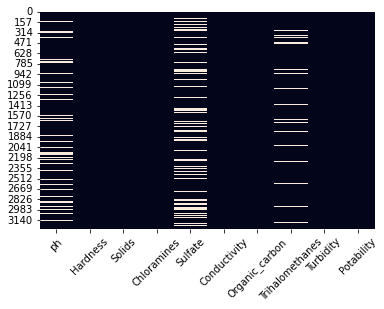

In [128]:
sns.heatmap(data.isnull(), cbar=False)
plt.xticks(rotation=45)
plt.show()

In [129]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# 결측치 처리(ph, Sulfate, Trihalomethanes)

- 1. dropna(null값을 포함한 데이터는 drop한다) => 데이터가 1526개로 약 절반가량으로 줄어든다.=> RandomForest 정확도가 상대적으로 낮다
- 2. null값이 있는 column을 drop한다.=> feature가 9개에서 6개로 줄어든다.=> RamdomForest 정확도가 상대적으로 낮다
- 3. Feature의 평균값 또는 중앙값으로 대체한다.=> RandomForest 정확도가 상대적으로 높다.

In [130]:
# 결측치 평균값으로 대체-1

data.loc[(data['Potability'] == 0) & (data['ph'].isna()), 'ph'] = data[data['Potability'] == 0]['ph'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['ph'].isna()), 'ph'] = data[data['Potability'] == 1]['ph'].mean(skipna=True)


data.loc[(data['Potability'] == 0) & (data['Sulfate'].isna()), 'Sulfate'] = data[data['Potability'] == 0]['Sulfate'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['Sulfate'].isna()), 'Sulfate'] = data[data['Potability'] == 1]['Sulfate'].mean(skipna=True)


data.loc[(data['Potability'] == 0) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = data[data['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = data[data['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)

In [131]:
# 결측치 중앙값으로 대체-2

#data.loc[(data['Potability'] == 0) & (data['ph'].isna()), 'ph'] = data[data['Potability'] == 0]['ph'].median(skipna=True)
#data.loc[(data['Potability'] == 1) & (data['ph'].isna()), 'ph'] = data[data['Potability'] == 1]['ph'].median(skipna=True)


#data.loc[(data['Potability'] == 0) & (data['Sulfate'].isna()), 'Sulfate'] = data[data['Potability'] == 0]['Sulfate'].median(skipna=True)
#data.loc[(data['Potability'] == 1) & (data['Sulfate'].isna()), 'Sulfate'] = data[data['Potability'] == 1]['Sulfate'].median(skipna=True)


#data.loc[(data['Potability'] == 0) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = data[data['Potability'] == 0]['Trihalomethanes'].median(skipna=True)
#data.loc[(data['Potability'] == 1) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = data[data['Potability'] == 1]['Trihalomethanes'].median(skipna=True)

In [132]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=0)

In [133]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

### Preprocessing

In [134]:
from sklearn.preprocessing import StandardScaler
sclaer=StandardScaler()
X_train=sclaer.fit_transform(X_train)
X_test=sclaer.transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [135]:
X_train=X_train.rename(columns={0:'ph',1:'Hardness', 2:'Solids',3:'Chloramines',4:'Sulfate', 5:'Conductivity',6:'Organic_carbon',7:'Trihalomethanes', 8:'Turbidity'})
X_test=X_test.rename(columns={0:'ph',1:'Hardness', 2:'Solids',3:'Chloramines',4:'Sulfate', 5:'Conductivity',6:'Organic_carbon',7:'Trihalomethanes', 8:'Turbidity'})

In [136]:
#y_train=pd.DataFrame(y_train)
#y_test=pd.DataFrame(y_test)

### Machine Learning
- Modeling

In [137]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2293, 9), (983, 9), (2293,), (983,))

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


models_acc = []
models = [DecisionTreeClassifier(), LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), GaussianNB(), SVC()]
for model in models:
    model.fit(X_train, y_train)    
    pred = model.predict(X_test)
    models_acc.append(accuracy_score(y_test, pred))

In [139]:
Model_list = pd.DataFrame({
    'Model Accuracy': models_acc, 
    "Model Name": ['DecisionTreeClassifier','LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GaussianNB', 'SVC']
})
Model_list

,Model Accuracy,Model Name
0,0.747711,DecisionTreeClassifier
1,0.624619,LogisticRegression
2,0.635809,KNeighborsClassifier
3,0.809766,RandomForestClassifier
4,0.611394,GaussianNB
5,0.682604,SVC


### Gridsearch

In [140]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=0)
#파라미터 후보 - 딕셔너리(key: 하이퍼 파라미터 이름, value: 후보리스트)
param_grid = {
    'n_estimators':[200],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[2 ,4, 6, 8],
    'min_samples_split':[2 ,4, 6,8]
}

grid_search = GridSearchCV(rfc, #모델
                           param_grid=param_grid, #하이퍼 파라미터 후보
                           scoring='accuracy',# 평가 지표
                           cv=4, # cross validation의 fold 개수
                           n_jobs=-1) # 사용할 cpu의 개수: -1은 모든 cpu 전부 사용(병렬 학습)

In [141]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [200]},
             scoring='accuracy')

In [142]:
df = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')#.filter(like='rank')
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
35,1.580057,0.286277,0.070107,0.003738,10,2,8,200,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.783972,0.787086,0.780105,0.788831,0.784998,0.003318,1
18,1.216564,0.011088,0.063863,0.001373,8,2,6,200,"{'max_depth': 8, 'min_samples_leaf': 2, 'min_s...",0.789199,0.787086,0.780105,0.783595,0.784996,0.003461,2
17,1.218300,0.010149,0.064478,0.000629,8,2,4,200,"{'max_depth': 8, 'min_samples_leaf': 2, 'min_s...",0.790941,0.788831,0.778360,0.781850,0.784995,0.005099,3
16,1.219796,0.008725,0.066046,0.001288,8,2,2,200,"{'max_depth': 8, 'min_samples_leaf': 2, 'min_s...",0.790941,0.788831,0.778360,0.781850,0.784995,0.005099,3
33,1.658779,0.304363,0.078611,0.022820,10,2,4,200,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.787456,0.790576,0.774869,0.780105,0.783252,0.006154,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.107674,0.010329,0.064112,0.000996,6,4,8,200,"{'max_depth': 6, 'min_samples_leaf': 4, 'min_s...",0.764808,0.781850,0.774869,0.762653,0.771045,0.007757,57
12,1.084474,0.010209,0.063748,0.001005,6,8,2,200,"{'max_depth': 6, 'min_samples_leaf': 8, 'min_s...",0.770035,0.776614,0.774869,0.760908,0.770606,0.006096,61
13,1.083438,0.012933,0.061723,0.001017,6,8,4,200,"{'max_depth': 6, 'min_samples_leaf': 8, 'min_s...",0.770035,0.776614,0.774869,0.760908,0.770606,0.006096,61
14,1.083569,0.007220,0.063049,0.001589,6,8,6,200,"{'max_depth': 6, 'min_samples_leaf': 8, 'min_s...",0.770035,0.776614,0.774869,0.760908,0.770606,0.006096,61


In [143]:
grid_search.best_score_

0.7849982669609793

In [144]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 200}

In [145]:
best_model = grid_search.best_estimator_
accuracy_score(y_test, best_model.predict(X_test))

0.8128179043743642

In [146]:
pred=best_model.predict(X_test)

In [147]:
print("Accuracy:", accuracy_score(y_test, pred)*100,'%') 
print("Recall:", recall_score(y_test, pred)*100,'%') 
print('Precision:',precision_score(y_test, pred)*100, '%') 
print('f1 score:',f1_score(y_test, pred)*100, '%')

Accuracy: 81.28179043743641 %
Recall: 59.78552278820375 %
Precision: 86.7704280155642 %
f1 score: 70.79365079365078 %


### Evaluation
- RandomForest

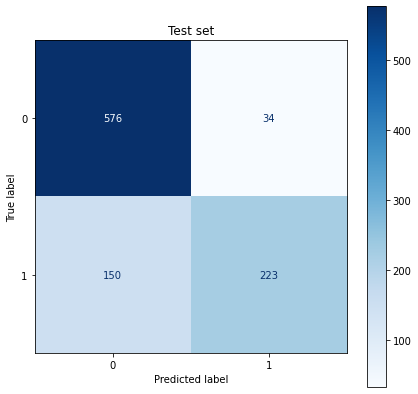

In [148]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(7,7))
ax = plt.gca()
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(cm, # confusion matrix
                              display_labels=['0', '1']) # [음성레이블, 양성레이블]
disp.plot(cmap='Blues', ax=ax) # 출력
plt.title('Test set')
plt.show()

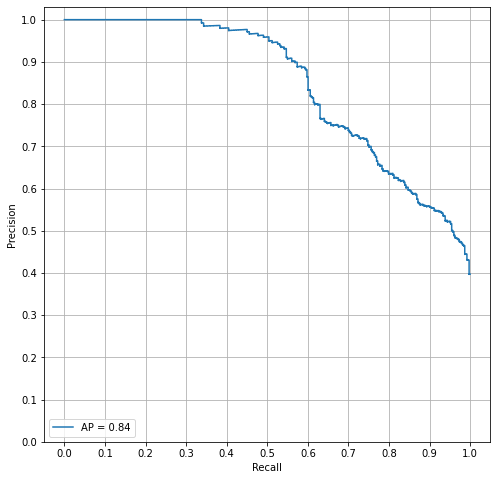

In [149]:
from sklearn.metrics import precision_score, average_precision_score,precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay 

rfc= best_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, rfc)
ap_rfc = average_precision_score(y_test, rfc)

plt.figure(figsize=(8,8))
ax = plt.gca()
disp = PrecisionRecallDisplay(precision, recall, average_precision=ap_rfc)
disp.plot(ax=ax);
plt.grid(True)
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.show()

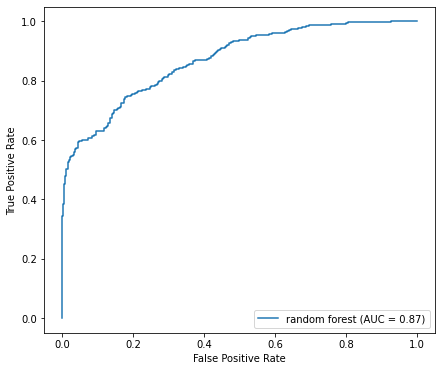

In [150]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

auc_rfc = roc_auc_score(y_test, rfc)
fprs_rfc, tprs_rfc, _ = roc_curve(y_test, rfc)


plt.figure(figsize=(7,6))
ax = plt.gca()
disp = RocCurveDisplay(fpr=fprs_rfc, tpr=tprs_rfc, roc_auc=auc_rfc, estimator_name='random forest')
disp.plot(ax=ax)
plt.show()

### Deep Learning
- MLP

In [151]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.InputLayer((1,9))) 
model.add(keras.layers.Flatten())  
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1, activation='softmax'))

In [152]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, y_train, 
                  epochs=10,
                  batch_size=9,
                  validation_split=0.3 
                 )

test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/10
179/179 [==============================] - 2s 6ms/step - loss: 0.0000e+00 - accuracy: 0.3844 - val_loss: 0.0000e+00 - val_accuracy: 0.4186
Epoch 2/10
179/179 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.3844 - val_loss: 0.0000e+00 - val_accuracy: 0.4186
Epoch 3/10
179/179 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3844 - val_loss: 0.0000e+00 - val_accuracy: 0.4186
Epoch 4/10
179/179 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.3844 - val_loss: 0.0000e+00 - val_accuracy: 0.4186
Epoch 5/10
179/179 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.3844 - val_loss: 0.0000e+00 - val_accuracy: 0.4186
Epoch 6/10
179/179 [==============================] - 1s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3844 - val_loss: 0.0000e+00 - val_accuracy: 0.4186
Epoch 7/10
179/179 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 0.3

In [153]:
model.summary() 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 9)                 0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               2560      
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 33        
Total params: 45,825
Trainable params: 45,825
Non-trainable params: 0
__________________________________________________

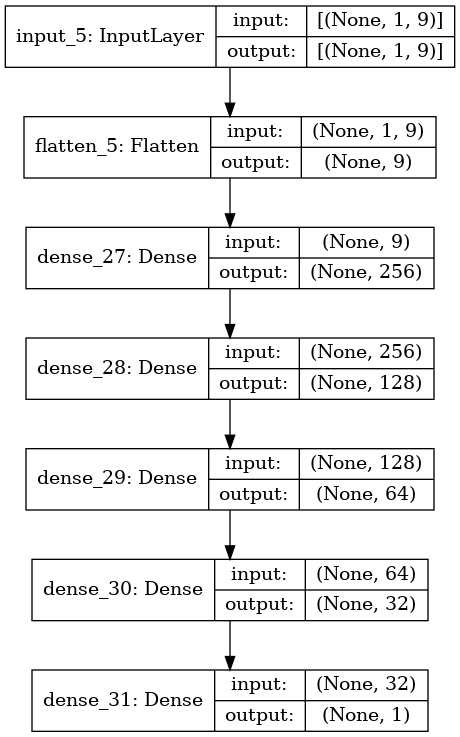

In [154]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_shapes.png', show_shapes=True)

In [155]:
test_loss, test_acc = model.evaluate(X_test, y_test)

31/31 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.3795


In [156]:
print(test_loss, test_acc)

0.0 0.37945064902305603


### Deep Learning
- DNN

In [157]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

np.random.seed(0)
tf.random.set_seed(0)

In [158]:
X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [159]:
X_train.shape, X_val.shape, X_test.shape

((1605, 9), (688, 9), (983, 9))

In [160]:
y_train.shape, y_val.shape, y_test.shape

((1605,), (688,), (983,))

In [161]:
LEARNING_RATE = 0.001
N_EPOCHS = 200
N_BATCHS = 100

N_TRAIN = X_train.shape[0]
N_VAL = X_val.shape[0]
N_TEST = X_test.shape[0]

In [162]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(N_BATCHS)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [163]:
def create_DNN_model():
    model = keras.Sequential()
    
    # 1. Flatten + Input Layer
    model.add(layers.Flatten(input_shape=(1,9))) 
    
    # 2. Hidden Layer
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=256, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=128, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=128, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=64, activation='relu'))
    
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(units=64, activation='relu'))
    
    # 3. Output Layer: 다중분류-unit수: class수, 각 unit이 클래스별 확률 => activation 함수: softmax
    model.add(layers.Dense(units=1, activation='sigmoid'))
    
    return model

In [164]:
model = create_DNN_model()

model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [165]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 9)                 0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 9)                 0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 9)                 36        
_________________________________________________________________
dense_32 (Dense)             (None, 256)               2560      
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dense_33 (Dense)             (None, 256)              

In [166]:
hist = model.fit(train_dataset,
                 epochs=N_EPOCHS,
                 validation_data=val_dataset)

Epoch 1/200
16/16 [==============================] - 2s 24ms/step - loss: 0.7785 - accuracy: 0.4869 - val_loss: 0.6804 - val_accuracy: 0.5858
Epoch 2/200
16/16 [==============================] - 0s 7ms/step - loss: 0.7129 - accuracy: 0.5544 - val_loss: 0.6780 - val_accuracy: 0.5858
Epoch 3/200
16/16 [==============================] - 0s 7ms/step - loss: 0.6965 - accuracy: 0.5825 - val_loss: 0.6819 - val_accuracy: 0.5858
Epoch 4/200
16/16 [==============================] - 0s 7ms/step - loss: 0.6900 - accuracy: 0.5700 - val_loss: 0.6828 - val_accuracy: 0.5858
Epoch 5/200
16/16 [==============================] - 0s 7ms/step - loss: 0.6834 - accuracy: 0.5931 - val_loss: 0.6826 - val_accuracy: 0.5858
Epoch 6/200
16/16 [==============================] - 0s 13ms/step - loss: 0.6833 - accuracy: 0.5956 - val_loss: 0.6839 - val_accuracy: 0.5858
Epoch 7/200
16/16 [==============================] - 0s 11ms/step - loss: 0.6694 - accuracy: 0.6056 - val_loss: 0.6857 - val_accuracy: 0.5858
Epoch 8/20

2022-07-19 13:47:19.730270: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


16/16 [==============================] - 0s 12ms/step - loss: 0.6315 - accuracy: 0.6494 - val_loss: 0.6346 - val_accuracy: 0.6381
Epoch 161/200
16/16 [==============================] - 0s 11ms/step - loss: 0.6160 - accuracy: 0.6762 - val_loss: 0.6378 - val_accuracy: 0.6294


2022-07-19 13:47:20.061967: W tensorflow/core/data/root_dataset.cc:167] Optimization loop failed: Cancelled: Operation was cancelled


Epoch 162/200
16/16 [==============================] - 0s 11ms/step - loss: 0.6284 - accuracy: 0.6531 - val_loss: 0.6358 - val_accuracy: 0.6352
Epoch 163/200
16/16 [==============================] - 0s 16ms/step - loss: 0.6102 - accuracy: 0.6731 - val_loss: 0.6353 - val_accuracy: 0.6424
Epoch 164/200
16/16 [==============================] - 0s 13ms/step - loss: 0.6223 - accuracy: 0.6556 - val_loss: 0.6378 - val_accuracy: 0.6381
Epoch 165/200
16/16 [==============================] - 0s 11ms/step - loss: 0.6190 - accuracy: 0.6712 - val_loss: 0.6360 - val_accuracy: 0.6424
Epoch 166/200
16/16 [==============================] - 0s 11ms/step - loss: 0.6189 - accuracy: 0.6637 - val_loss: 0.6352 - val_accuracy: 0.6381
Epoch 167/200
16/16 [==============================] - 0s 7ms/step - loss: 0.6106 - accuracy: 0.6687 - val_loss: 0.6377 - val_accuracy: 0.6381
Epoch 168/200
16/16 [==============================] - 0s 7ms/step - loss: 0.6163 - accuracy: 0.6769 - val_loss: 0.6392 - val_accuracy: 0

In [167]:
loss, acc = model.evaluate(test_dataset)

10/10 [==============================] - 0s 3ms/step - loss: 0.6128 - accuracy: 0.6694


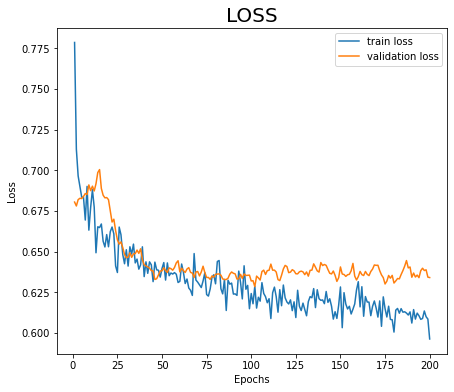

In [168]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='train loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='validation loss')
plt.title("LOSS", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

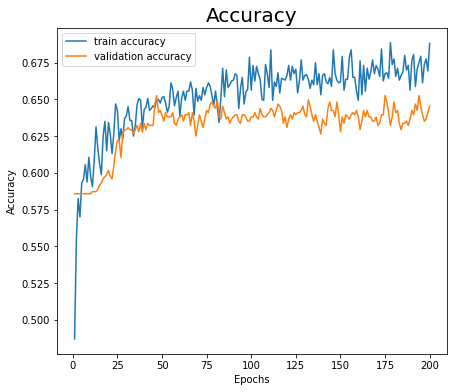

In [169]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['accuracy'], label='train accuracy')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_accuracy'], label='validation accuracy')
plt.title("Accuracy", fontsize=20)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [170]:
new_data = X_test[:5]
pred = model.predict(new_data)
threshold = 0.5
result = (pred > threshold).astype(np.int8)
result

array([[1],
       [0],
       [0],
       [0],
       [0]], dtype=int8)

In [171]:
y_test[:5]

2017    1
2533    0
589     0
482     0
2620    0
Name: Potability, dtype: int64

In [172]:
pred=model.predict(X_test)
result=(pred>threshold).astype(np.int8)

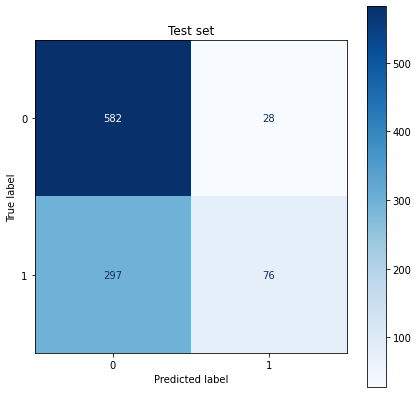

In [173]:
plt.figure(figsize=(7,7))
ax = plt.gca()
cm = confusion_matrix(y_test, result)
disp = ConfusionMatrixDisplay(cm, # confusion matrix
                              display_labels=['0', '1']) # [음성레이블, 양성레이블]
disp.plot(cmap='Blues', ax=ax) # 출력
plt.title('Test set')
plt.show()